<a href="https://colab.research.google.com/github/rafli19012001/Pemgrograman_python/blob/main/Tugas_Python_14_Rafli%20Aulia%20Hafiz_1101190039.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
frek1 = 700 #MHz
frek2 = 900 #MHz
frek3 = 1800 #MHz
tipe1 = 'urban'
tipe2 = 'suburban'
tipe3 = 'open'
ht = 80 #meter
hr = 1.5 #meter
d = np.random.randint(300,1001,200)
y1=d**2
y2=d**3
y3=d**4

In [3]:
print(d)

[393 695 455 981 339 821 303 981 428 569 603 552 442 628 385 389 311 656
 853 973 931 415 894 322 668 394 549 925 932 866 354 889 501 543 846 847
 660 943 348 780 346 550 559 811 441 777 670 682 479 895 748 659 635 510
 856 494 565 562 983 974 431 624 310 461 559 571 566 843 686 956 849 374
 393 925 344 547 305 764 932 862 429 714 507 334 736 787 948 759 649 300
 494 668 578 885 865 833 885 517 930 825 378 344 730 975 894 376 930 771
 723 692 385 868 381 868 380 683 558 573 891 636 533 618 603 713 486 759
 416 499 841 869 811 818 302 806 366 479 919 494 783 973 353 706 394 848
 995 526 475 640 328 469 371 718 988 879 885 627 646 730 758 555 410 397
 871 410 382 728 693 984 941 375 513 550 345 679 424 916 493 878 317 497
 380 998 397 446 846 421 556 507 770 600 653 318 378 605 827 778 530 520
 591 968]


In [4]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [5]:
#Frekuensi 1800 MHz
LpUrban=cos(frek3,tipe1,ht,hr,d)
LpSuburban=cos(frek3,tipe2,ht,hr,d)
LpOpen=cos(frek3,tipe3,ht,hr,d)

#Model Urban
Lpf=cos(frek1,tipe1,ht,hr,d)
Lpf2=cos(frek2,tipe2,ht,hr,d)
Lpf3=cos(frek3,tipe3,ht,hr,d)

In [6]:
#Frekuensi 1800 MHz
print(LpUrban)
print(LpSuburban)
print(LpOpen)

#Model Urban
print(Lpf)
print(Lpf2)
print(Lpf3)

[179.15583628 187.18643176 181.21929832 192.04140304 177.07375648
 189.5333576  175.4923326  192.04140304 180.35758368 184.36874179
 185.18626141 183.94147257 180.81097299 185.75848621 178.8661348
 179.01173029 175.85942145 186.37293666 190.07196515 191.92605962
 191.30450713 179.92309826 190.73326087 176.34903982 186.62828331
 179.19163359 183.86470814 191.213432   191.31962924 190.28502458
 177.68364557 190.65425765 182.5759253  183.70991276 189.95589191
 189.97253248 186.45856755 191.48490965 177.44284933 188.81173107
 177.36166041 183.89034279 184.11897926 189.36072998 180.77906757
 188.75744878 186.67039466 186.92045278 181.94337571 190.74900848
 188.22164531 186.43720858 185.91462979 182.82672547 190.12141952
 182.37772371 184.26936756 184.19437411 192.07009193 191.9405293
 180.45597456 185.668478   175.81405511 181.40383683 184.11897926
 184.41816723 184.29427692 189.90585194 187.00282867 191.67777321
 190.00575475 178.45780947 179.15583628 191.213432   177.28000084
 183.8132984

In [7]:
#Frekuensi 1800 MHz
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Suburban_sort=LpSuburban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

#Model Urban
d_sort=d[np.argsort(d)]
f_sort=Lpf[np.argsort(d)]
f2_sort=Lpf2[np.argsort(d)]
f3_sort=Lpf3[np.argsort(d)]

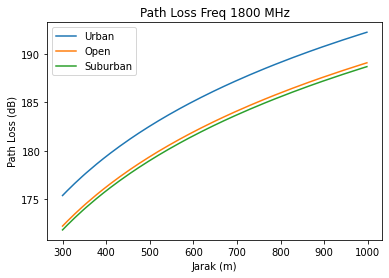

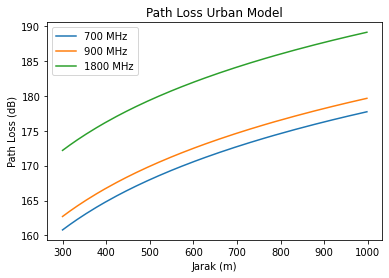

In [8]:
plt.figure()
plt.title('Path Loss Freq 1800 MHz')
plt.plot(d_sort, Urban_sort, label='Urban')
plt.plot(d_sort, Open_sort, label='Open')
plt.plot(d_sort, Suburban_sort, label='Suburban')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

#Model Urban
plt.figure()
plt.title('Path Loss Urban Model')
plt.plot(d_sort, f2_sort, label='700 MHz')
plt.plot(d_sort, f_sort, label='900 MHz')
plt.plot(d_sort, f3_sort, label='1800 MHz')
plt.legend()
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [9]:
#Daya Transmitter
def daytrans (ht, hl, gt, gr):
  dayter = (10*(np.log(ht))) - hl + gt + gr
  dayter = 10**(dayter/10)
  return dayter

power_tran = 30000
gain_tran = 10
gain_rece = 2

In [10]:
PTUrban = daytrans(power_tran, Urban_sort, gain_tran, gain_rece)
PTSuburban = daytrans(power_tran, Suburban_sort, gain_tran, gain_rece)
PTOpen = daytrans(power_tran, Open_sort, gain_tran, gain_rece)
PTUrban2 = daytrans(power_tran, f_sort, gain_tran, gain_rece)
PTUrban3 = daytrans(power_tran, f2_sort, gain_tran, gain_rece)

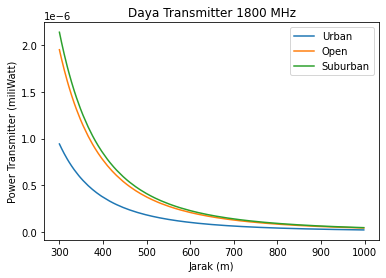

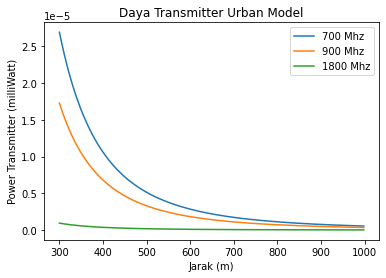

In [11]:
#Frekuensi 1800 MHz
plt.figure()
plt.title("Daya Transmitter 1800 MHz")
plt.plot(d_sort, PTUrban, label = "Urban")
plt.plot(d_sort, PTOpen, label = "Open")
plt.plot(d_sort, PTSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (miliWatt)')
plt.legend()
plt.show()

#Model Urban
plt.figure()
plt.title("Daya Transmitter Urban Model")
plt.plot(d_sort, PTUrban3, label = "700 Mhz")
plt.plot(d_sort, PTUrban2, label = "900 Mhz")
plt.plot(d_sort, PTUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Power Transmitter (milliWatt)')
plt.legend()
plt.show()

In [12]:
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [13]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

In [14]:
#Signal to Noise Ratio
def snr(dayter, BW):
  noise = -174 + 10*(np.log10(BW))
  noise = 10**(noise/10)
  sigtonoi = dayter/noise
  return sigtonoi

bw =  5*(10**6)

In [15]:
SNRUrban = snr(PTUrban, bw)
SNRSuburban = snr(PTSuburban, bw)
SNROpen = snr(PTOpen, bw)
SNRUrban2 = snr(PTUrban2, bw)
SNRUrban3 = snr(PTUrban3, bw)

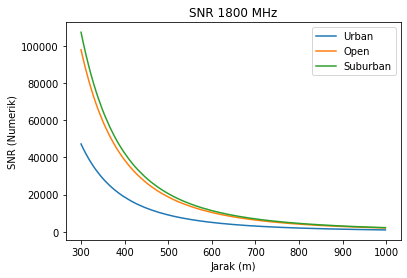

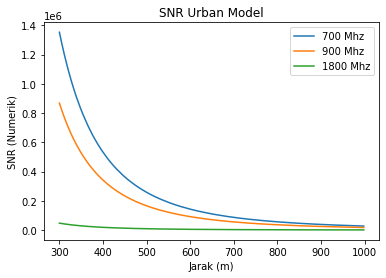

In [16]:
#SNR Frekuensi 1800 MHz
plt.figure()
plt.title("SNR 1800 MHz")
plt.plot(d_sort, SNRUrban, label = "Urban")
plt.plot(d_sort, SNROpen, label = "Open")
plt.plot(d_sort, SNRSuburban, label = "Suburban")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()

#SNR Urban Model
plt.figure()
plt.title("SNR Urban Model")
plt.plot(d_sort, SNRUrban3, label = "700 Mhz")
plt.plot(d_sort, SNRUrban2, label = "900 Mhz")
plt.plot(d_sort, SNRUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (Numerik)')
plt.legend()
plt.show()

In [17]:
#Kapasitas Seluler 
def kapasitas (sig, BW):
  kpssel = BW*(np.log2(1+sig))
  return kpssel

In [18]:
KapasitasUrban = kapasitas(SNRUrban, bw)
KapasitasSuburban = kapasitas(SNRSuburban, bw)
KapasitasOpen = kapasitas(SNROpen, bw)
KapasitasUrban2 = kapasitas(SNRUrban2, bw)
KapasitasUrban3 = kapasitas(SNRUrban3, bw)

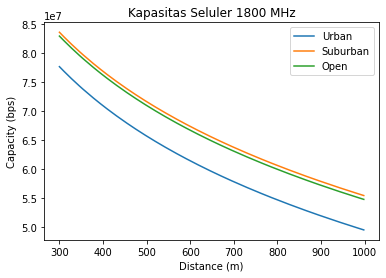

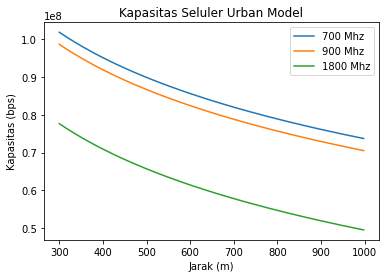

In [19]:
#Kapasitas Seluler 1800 Mhz
plt.figure()
plt.title("Kapasitas Seluler 1800 MHz")
plt.plot(d_sort,KapasitasUrban, label = "Urban")
plt.plot(d_sort,KapasitasSuburban, label = "Suburban")
plt.plot(d_sort,KapasitasOpen, label = "Open")
plt.xlabel('Distance (m)')
plt.ylabel('Capacity (bps)')
plt.legend()
plt.show()

#Kapasitas Seluler Urban Model 
plt.figure()
plt.title("Kapasitas Seluler Urban Model")
plt.plot(d_sort, KapasitasUrban3, label = "700 Mhz")
plt.plot(d_sort, KapasitasUrban2, label = "900 Mhz")
plt.plot(d_sort, KapasitasUrban, label = "1800 Mhz")
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas (bps)')
plt.legend()
plt.show()